In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Load the dataset
df = pd.read_csv('cleaned_ecommerce_data.csv')

# Use forward fill (ffill) to fill missing values without the warning
df.ffill(inplace=True)
  # You can use other methods if needed

# Encode categorical variables
label_encoder = LabelEncoder()
df['Product Category'] = label_encoder.fit_transform(df['Product Category'])
df['Payment Method'] = label_encoder.fit_transform(df['Payment Method'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])

# Select relevant numerical columns for clustering (you can adjust these)
X = df[['Product Price', 'Quantity', 'Total Purchase Amount', 'Customer Age']]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [3]:
from sklearn.decomposition import PCA

# Perform PCA to reduce dimensionality
pca = PCA(n_components=2)  # Reduce to 2 principal components for visualization
X_pca = pca.fit_transform(X_scaled)


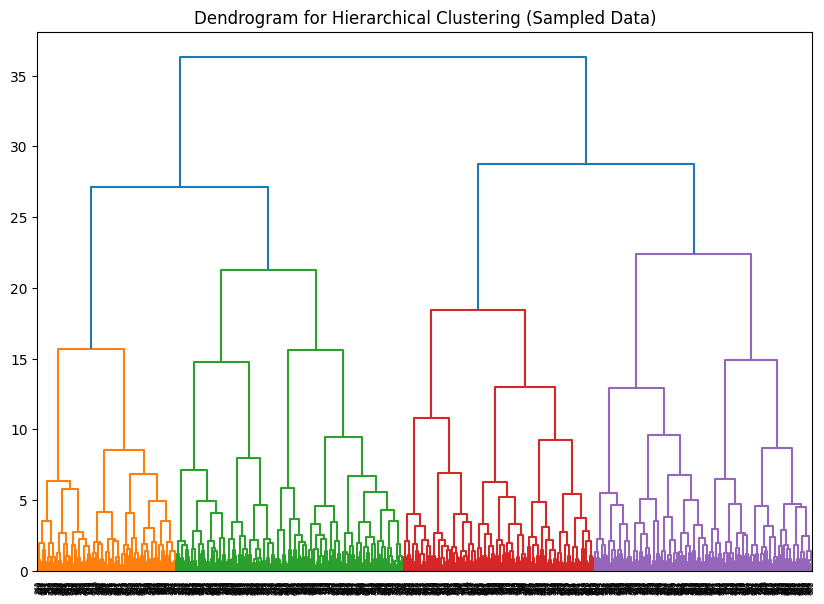

In [4]:
# Randomly sample a subset of the data (e.g., 1000 rows)
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
df_sample = df.sample(n=1000, random_state=42)
X_sampled = df_sample[['Product Price', 'Quantity', 'Total Purchase Amount', 'Customer Age']]

# Scale the sampled data
X_sampled_scaled = scaler.fit_transform(X_sampled)

# Perform hierarchical clustering on the sampled data
Z = linkage(X_sampled_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title("Dendrogram for Hierarchical Clustering (Sampled Data)")
plt.show()



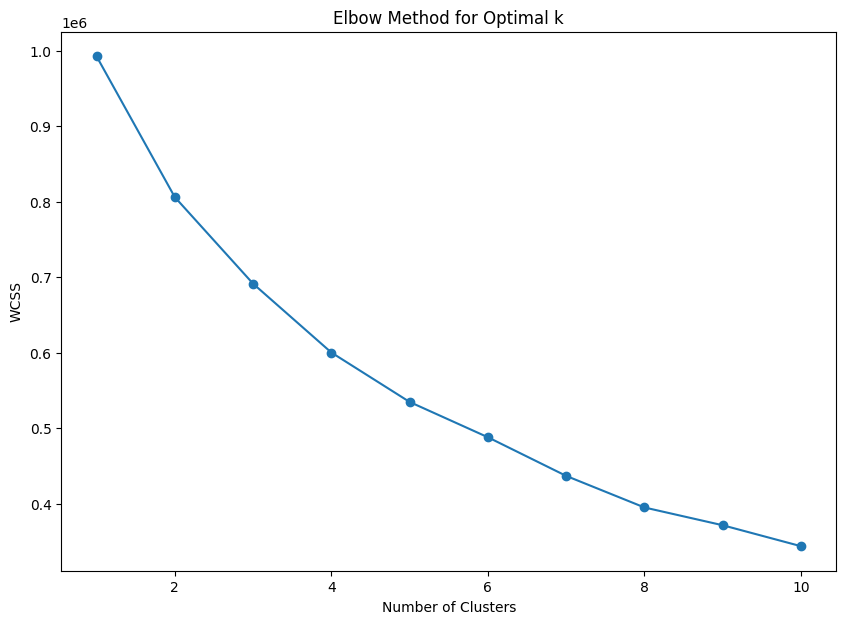

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Use the elbow method to find the optimal number of clusters
wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(10, 7))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Perform K-Means clustering with optimal k (choose from elbow plot)
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)  # Example: 3 clusters
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the dataframe
df['Cluster'] = clusters
 

In [6]:
from sklearn.metrics import davies_bouldin_score

# Evaluate clustering with Davies-Bouldin Index
dbi_score = davies_bouldin_score(X_scaled, clusters)
print(f'Davies-Bouldin Index: {dbi_score}')


Davies-Bouldin Index: 1.7149984455431853


In [7]:
from sklearn.metrics import calinski_harabasz_score

# Evaluate clustering with Calinski-Harabasz Index
ch_score = calinski_harabasz_score(X_scaled, clusters)
print(f'Calinski-Harabasz Index: {ch_score}')


Calinski-Harabasz Index: 54093.95457944088
